# Getting Data

Example of a script to pipe data from `stdin` and `stdout`:

```python
# egrep.py
import sys
import re

regex = sys.argv[1]

for line in sys.stdin:
    if re.search(regex, line):
        sys.stdout.write(line)
```

Example of a script that counts the lines it receives and writes the count:

```python
# linecount.py
import sys

count = 0
for line in sys.stdin:
    count += 1

print(count)
```

You can then use both scripts to count lines that contain numbers:

```bash
$ cat SomeFile.txt | python egrep.py "[0-9]" | python line_count.py
```

Example of a script that counts the words in its input and writes out the most common ones:

```python
# most_common_words.py
import sys
from collections import Counter

try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1)
    
counter = Counter(word.lower() for line in sys.stdin for word in line.strip().split() if word)
for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sts.stdout(write("\t"))
    sys.stdout.write(word)
    sys.stdout.write("\n")
```

and can be used like so:

```bash
$ cat the_bible.txt | python most_commonwords.py 10
64193 the
51380 and
34753 of
13643 to
12799 that
12560 in
10263 he
9840  shall
8987  unto
8836  for
```

Example of a script that reads from and writes to files:

```python
file_for_reading = open('reading_file.txt', 'r')
file_for_writing = open('writing_file.txt', 'w')
file_for_appending = open('appending_file.txt', 'a')
file_for_writing.close()
```
    
And an easy way to automatically close your file:

```python
with open('file.txt', 'r') as f:
    data = function_that_gets_data_from(f)
process(data)
```

Example of a script to read a whole text file:

```python
starts_with_hash = 0

with open('input.txt' 'r') as f:
    for line in file:
        if re.match("^#", line):
            starts_with_hash += 1
```

use the `strip()` function to remove special characters when processing.  Here's an example of a couple of functions that allow to to plot email addresses by domain to a histogram:

```python
def get_domain(email_address):
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt'. 'r') as f:
    domain_counts = Counter(get_domain(line.strip()) for line in f if "@" in line)
```

Example of a script that processes delimited files:

*delimited file contents:*

```
6/20/2014  AAPL  90.91
6/20/2014  MSFT  41.68
6/20/2014  FB    64.14
6/19/2014  AAPL  91.86
6/19/2014  MSFT  41.51
6/19/2014  FB    64.34
```

*script:*

```python
import csv

with open('tab_delimited_stock_prices.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)
```

And if the file has headers:

*delimited file contents with headers:*

```
date:symbol:closing_price
6/20/2014:AAPL:90.91
6/20/2014:MSFT:41.68
6/20/2014:FB:64.14
6/19/2014:AAPL:91.86
6/19/2014:MSFT:41.51
6/19/2014:FB:64.34
```

*script:*

```python
with open('colon_delimited_stock_prices.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row['date']
        symbol = row['symbol']
        closing_price = float(row['closing_price']))
        process(date, symbol, closing_price)
```

`DictReader()` can also be used to give a header to your delimited file even if it lacks headers.

Example of a script that writes delimited data:

```python
today_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5}
with open('comma_delimited_stock_prices.txt', 'w') as f:
    writer = csv.writer(f, delimter=',')
    for stock, price in todat_prices.iteritems():
        writer.writerow([stock, price])
```

To scrape data from the web, we will use beautifulsoup and html5lib.  Let's see an example of its use:

In [103]:
from bs4 import BeautifulSoup
import requests

html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')
soup

<!DOCTYPE html>
<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8"/>
    <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
    <meta content="width=device-width, initial-scale=1" name="viewport"/>
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain i

Here's an example of how to find the first paragraph using tags:

In [14]:
first_paragraph = soup.find('p')
first_paragraph

<p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>

and to get only the text of the contents:

In [23]:
first_paragraph_text = soup.p.text
print(first_paragraph_text)
first_paragraph_words = soup.p.text.split()
first_paragraph_words

This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.


['This',
 'domain',
 'is',
 'established',
 'to',
 'be',
 'used',
 'for',
 'illustrative',
 'examples',
 'in',
 'documents.',
 'You',
 'may',
 'use',
 'this',
 'domain',
 'in',
 'examples',
 'without',
 'prior',
 'coordination',
 'or',
 'asking',
 'for',
 'permission.']

And to extract a tag's attributes you can just treat it like a dict:

```python
first_paragraph_id = soup.p['id']      # returns key error if no id key
first_paragraph_id2 = soup.p.get('id') # returns none if no id key
```

To find tags with a specific class:

In [47]:
important_paragraphs = soup('p', {'class': 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p') if 'important' in p.get('class', [])]

These methods can be combined to implement elaborate logic.  For example, to find every `<span>` element that is contained inside a `<div>` element, you would try:

In [104]:
spans_inside_divs = [span for div in soup('div') for span in div('span')]
spans_inside_divs

[]

Here's an applied example using O'Reilly books data:

*note: this part of the chapter had to be completely rewritten since the example used by the book was no longer usable after Safari Books online replaced O'Reilly shop.*

In [50]:
url = 'https://ssearch.oreilly.com/?q=data+science'
soup = BeautifulSoup(requests.get(url).text, 'html5lib')
soup

<!DOCTYPE html>
<html lang="en"><!--header scrape--><head>
<title>O'Reilly Search: data science</title>
<!-- v3.1 updated to new font styles -->

<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="English" name="language_name"/>
<meta content="English" name="native_language_name"/>

<link href="//www.oreilly.com/favicon.ico" rel="icon" type="image/png"/>
<link href="//cdn.oreillystatic.com/assets/css/2017_font_face.css" rel="stylesheet" type="text/css"/>

<script type="text/javascript">
// global variables for power reviews integration setup.
    var pr_locale= "en_US"; 
    var pr_zip_location= "//shop.oreilly.com/text/";
//    var pr_style_sheet= "//cdn.oreillystatic.com/oreilly/ml/css/reviews_social.css"; 
</script>

<link href="//cdn.oreillystatic.com/assets/css/norm-layout-171020.css" rel="stylesheet" type="text/css"/>
<link href="//cdn.oreillystatic.com/assets/css/norm-search-171023.css" rel="stylesheet" type="text/css"/>


To find all the article result tag elements:

In [51]:
results = soup('article', 'result')
print(len(results))

16


Next, we'd like to filter out all videos:

In [52]:
def is_video(result):
    return True if len(result('img', 'book')) == 0 else False

len([result for result in results if not is_video(result)])

12

Next, we can begin to pull data out of the article elements:

In [72]:
for result in results:
    if not is_video(result):
        title = list(result('p', 'title')[0].stripped_strings)[0]
        author_name = list(result('p', 'note')[0].stripped_strings)[0]
#       authors = [x.strip() for x in re.sub("^By ", author_name).split(',')]
        publisher = list(result('p', 'note')[1].stripped_strings)[0]
        date = " ".join(list(result('p', 'note')[2].stripped_strings)[0].split())

And to put it all together into a function:

In [88]:
from time import sleep

def is_released(result):
    date = " ".join(list(result('p', 'date2')[0].stripped_strings)[0].split())
    if date.split()[-1] == 'Date':
        return False
    if date.split()[-1] == 'None':
        return False
    else:
        return True

def is_published(result):
    return True if list(result('p', 'publisher')) else False

def book_info(result):
    try:
        title = list(result('p', 'title')[0].stripped_strings)[0]
        author_name = list(result('p', 'note')[0].stripped_strings)[0]
        publisher = list(result('p', 'publisher')[0].stripped_strings)[0]
        date = " ".join(list(result('p', 'date2')[0].stripped_strings)[0].split())
    except:
        print(result)
        raise
    
    return {
        "title": title,
        "author_name": author_name,
        "publisher": publisher,
        "date": date
    }

base_url = 'https://ssearch.oreilly.com/?i=1;page={0};q=data+science&act=pg_{0}'

books = []

NUM_PAGES = 132

for page_num in range(1, NUM_PAGES + 1):
    url = base_url.format(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for result in soup('article', 'result'):
        if not is_video(result) and is_released(result) and is_published(result):
            books.append(book_info(result))
    sleep(30)

Now that we've gotten the data, we can plot the number of books published each year:

153


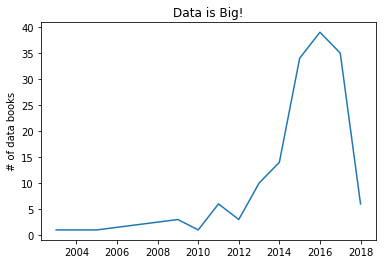

In [92]:
import matplotlib.pyplot as plt

print(len(books))
def get_year(books):
    return int(books['date'].split()[-1] if books['date'].split()[-1] != 'None' else 2018)

year_counts = Counter(get_year(book) for book in books if get_year(book) <= 2018)
years = sorted(year_counts)
books_counts = [year_counts[year] for year in years]
plt.plot(years, books_counts)
plt.ylabel('# of data books')
plt.title('Data is Big!')
plt.show()

We can also parse json with python:

In [94]:
import json

serialized = """
{
    "title": "Data Science Book",
    "author": "Joel Grus",
    "publicationYear": 2014,
    "topics": [
        "data",
        "science",
        "data science"
    ]
}
"""

deserialized = json.loads(serialized)
if "data science" in deserialized['topics']:
    print(deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


there are ways to interact with unauthenticated apis:

In [96]:
endpoint = 'https://api.github.com/users/joelgrus/repos'
repos = json.loads(requests.get(endpoint).text)
repos

[{'id': 112873601,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTI4NzM2MDE=',
  'name': 'advent2017',
  'full_name': 'joelgrus/advent2017',
  'owner': {'login': 'joelgrus',
   'id': 1308313,
   'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
   'avatar_url': 'https://avatars1.githubusercontent.com/u/1308313?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/joelgrus',
   'html_url': 'https://github.com/joelgrus',
   'followers_url': 'https://api.github.com/users/joelgrus/followers',
   'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
   'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
   'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
   'repos_url': 'https://api.github.com/users/joelgrus/repos',
   'events_url': 'https://api.github.com/users/joelgrus/events{/pri

And we can parse the data into something measurable:

In [101]:
from dateutil.parser import parse
dates = [parse(repo['created_at']) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)
weekday_counts, month_counts

(Counter({5: 2, 4: 5, 1: 7, 2: 7, 6: 4, 3: 3, 0: 2}),
 Counter({12: 2,
          2: 3,
          1: 4,
          7: 6,
          5: 4,
          11: 5,
          9: 1,
          6: 1,
          8: 2,
          4: 1,
          10: 1}))

And we can parse the language of each repo as well:

In [102]:
last_5_repositories = sorted(repos, key=lambda r: r['created_at'], reverse=True)[:5]
last_5_languages = [repo['language'] for repo in last_5_repositories]
last_5_repositories, last_5_languages

([{'id': 122641019,
   'node_id': 'MDEwOlJlcG9zaXRvcnkxMjI2NDEwMTk=',
   'name': 'ai2',
   'full_name': 'joelgrus/ai2',
   'owner': {'login': 'joelgrus',
    'id': 1308313,
    'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
    'avatar_url': 'https://avatars1.githubusercontent.com/u/1308313?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/joelgrus',
    'html_url': 'https://github.com/joelgrus',
    'followers_url': 'https://api.github.com/users/joelgrus/followers',
    'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
    'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
    'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
    'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
    'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
    'repos_url': 'https://api.github.com/users/joelgrus/repos',
    'events_url': 'https://api.github.com/users/joelgrus/events